# Aula 1- Validação cruzada (Cross Validation)

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Holdout set
- 2) Validação cruzada
- 3) Leave one out
- 4) Hiperparâmetros (discussão inicial)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from ml_utils import *

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

____
____
____

## 0) Estratégia "Holdout set": Conjuntos de treino, validação e teste

Como vimos, no aprendizado de máquina nós temos alguns dados (__conjunto de treino__), e depois fazemos um experimento com uma amostra de dados que nunca vimos (__conjunto de teste__) para saber o quão bem o modelo consegue generalizar.

Assim, temos o erro dentro do conjunto de treino, $E_{in}$, e o erro de generalização, pra dados daquele tipo fora desse conjunto, $E_{out}$. 
<br><br>

<div>
    <img src="images/treino_teste.png" width=500>
</div>

O problema é que, __se usarmos o conjunto de teste de qualquer forma para aprendizado, o erro que obtivermos nele deixa de refletir o erro de generalização__. 

Por exemplo, se treinarmos 3 modelos, e compararmos eles usando o conjunto de teste, o erro no teste não reflete mais o $E_{out}$.

Outro exemplo são certas transformações dos nossos dados. Imagina que pegamos nossos dados, "normalizamos" eles (ou seja, pegamos nossas features e transformamos elas de forma que tenham um range de 0 a 1), e então fazemos a divisão entre conjunto de treino e conjunto de teste. Nesse caso, você já usou o conjunto de teste para "aprender" algo (para normalizar, a gente usa o maior valor da feature na tabela). Logo, sua medida de $E_{out}$ não vale mais. 

O que fazer então? Nós usamos o __conjunto de validação__ (ou _hold-out set_).
<br><br>
<div>
    <img src="images/treino_validacao.png" width=500>
</div>

Com essa separação podemos treinar e validar nosso modelo sem necessitar usar o conjunto de teste e, dessa forma, assumir que o $E_{out}$ se __aproxima de certa forma do erro de generalização__.

<img src="images/cv.png" width=500 text="https://github.com/rasbt/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb">


Isso foi o que fizemos nas últimas aulas.

Após validar e escolher o modelo, nós podemos juntar os dados de treino, validação e teste em uma única base, e treinarmos o modelo final. Entende-se que os erros do nosso algoritmo só tendem a diminuir, quando fazemos isso.

## 1) Validação cruzada (cross validation)

O cross validation (CV) é uma das técnicas mais importantes no ferramental de um cientista de dados.

Operacionalmente, o CV implementa diferentes conjuntos de treino e teste (aqui chamados de **validação**), criando efetivamente diferentes modelos treinados e avaliados em diferentes suconjuntos aleatórios (os chamados **folds**) da base de dados original. 

No fim, é possível inspecionar as métricas de interesse em cada fold, bem como ter uma ideia da performance média do modelo, olhando para **a distribuição das métricas de avaliação**.

Note que este procedimento está intimamente relacionado com a avaliação da desejável habilidade de **generalização do modelo**!

A forma mais comum de fazermos CV é através da técnica **k-fold**:

<img src=https://scikit-learn.org/stable/_images/grid_search_cross_validation.png width=500>

No extremo desta abordagem, podemos tomar o número $k$ de folds igual ao número de observações na base ($n$). Neste caso, utiliza-se **uma única** observação para teste, enquanto o resto do dataset é utilizado para treino. Essa abordagem é conhecida como **leave one out (LOO)**:

<img src=https://assets.datacamp.com/production/repositories/3981/datasets/8a6236f142b1ee2e4a70aae2af9507c7c580f302/Screen%20Shot%202019-01-27%20at%209.25.41%20AM.png width=500>

Note que o esforço computacional aumenta conforme $k$ aumenta, sendo máximo quando $k=n$. Por esse motivo, recomenda-se usar o LOO apenas nos casos em que o número de observções na base original é bem pequeno ($\sim 10^2$).

#### Como escolher o valor de k?
- Um __k maior__ significa que cada modelo é treinado em um __conjunto de treinamento maior__ e testado em um conjunto de __validação menor__. Em teoria, isso deve levar a um erro de previsão __(bias) menor__, pois os modelos veem mais dados disponíveis. Porém, um K maior também vai consumir __mais tempo de treino__.

- Um __k menor__ significa que o modelo é treinado em um __conjunto de treinamento menor__ e testado em um conjunto de __validação maior__. Aqui, o potencial para a distribuição de dados na validação diferir do conjunto de treinamento é maior e, portanto, devemos esperar um __erro de previsão mais alto__ em média.

No gráfico abaixo, alguns dados gerados foram divididos em 3 (esquerda) e 10 (direita) folds. Cada linha representa o melhor modelo linear para um fold (ou seja, o modelo que teria o menor erro de previsão ao testar nesse fold). Quando k = 3, uma único fold tem uma distribuição altamente diferente dos outros dois. Isso pode ter um grande impacto no erro de previsão da validação cruzada. Quando k=10, alguns folds também podem diferir muito, mas, em média, o modelo estará mais próximo do modelo que, em geral, reduz mais o erro de previsão:

<img src="images/kfolds.png" text="https://cran.r-project.org/web/packages/cvms/vignettes/picking_the_number_of_folds_for_cross-validation.html" width=700 />

Uma abordagem para responder a essa pergunta é realizar uma análise de sensibilidade para diferentes valores de k. Ou seja, avalie o desempenho do mesmo modelo no mesmo conjunto de dados com diferentes valores de k e veja como eles se comparam (raramente isso é feito).

Em geral, dividimos nosso dataset em 3, 5 ou 10 folds.

Para se aprofundar no tema: https://stats.stackexchange.com/questions/61546/optimal-number-of-folds-in-k-fold-cross-validation-is-leave-one-out-cv-always


### Sklearn

Vamos implementar o procedimento de CV utilizando o sklearn!

No [submódulo model_selection](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection), temos três ferramentas muito importantes para o processo de CV:

- [KFold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html#sklearn.model_selection.KFold): classe que cria os folds. Obs.: para fazer o LOO, basta colocar $k=n$ folds, ou então usar diretamente a classe que implementa o [LOO](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.LeaveOneOut.html#sklearn.model_selection.LeaveOneOut);

- [Stratified K-Fold](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html?highlight=stratifiedkfold#sklearn.model_selection.StratifiedKFold): classe que cria os folds de forma estratificada, ou seja, preservando a proporção das classes em cada um dos folds;

- [cross_validate](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate): método que recebe os folds e os utiliza para o treinamento e avaliação cruzada de modelos, segundo a métrica definida.

<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_006.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>
<img src=https://scikit-learn.org/stable/_images/sphx_glr_plot_cv_indices_009.png text=https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html>

Para ilustrar o CV,  vamos utilizar os datasets artificiais que o sklearn proporciona:

_______

Vamos começar com um exemplo de **regressão**

In [4]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples = 500,
                        n_features = 5, n_informative = 3, 
                        noise = 25, tail_strength = 10,
                        random_state = 42)

In [5]:
X_df = pd.DataFrame(X, columns=[f"X{i+1}" for i in range(X.shape[1])])
y_df = pd.Series(y, name="y")

df = pd.concat([X_df, y_df], axis=1)
df

,X1,X2,X3,X4,X5,y
0,-0.109610,0.546284,-0.088363,0.006422,-0.436386,79.870807
1,-1.024388,-0.926930,-0.252568,-0.059525,-3.241267,-115.324859
2,-2.650970,0.106430,1.091507,-0.254977,1.503993,35.552509
3,-0.850520,-0.138456,-0.580523,-1.224298,-0.209023,-145.413703
4,-0.322680,-0.756795,-0.250833,-1.421811,1.501334,-116.148875
...,...,...,...,...,...,...
495,-1.363174,-1.598124,0.189706,0.462173,2.024310,-87.798391
496,0.239247,-1.979300,2.074083,0.747910,-1.072743,-92.452927
497,2.189803,-0.767348,-0.808298,0.872321,0.183342,20.274546
498,0.615367,0.513106,-0.935439,-0.259547,0.738810,43.199300


In [6]:
df.describe()

,X1,X2,X3,X4,X5,y
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.012412,0.047211,0.089335,-0.004983,0.024845,3.420332
std,0.955087,0.969309,0.999397,1.038814,0.949985,110.693405
min,-2.650970,-2.703232,-3.019512,-2.940389,-3.241267,-297.665107
25%,-0.642849,-0.577418,-0.576895,-0.682826,-0.644153,-68.294863
50%,0.033078,0.081273,0.040829,-0.024875,0.008918,4.208483
75%,0.658720,0.668974,0.751524,0.671004,0.635892,76.120529
max,3.078881,3.193108,3.852731,2.558199,3.137749,349.448456


Vamos calcular a correlação entre as variáveis independentes:

In [7]:
df.corr()

,X1,X2,X3,X4,X5,y
X1,1.000000,0.022302,-0.038972,-0.057761,-0.004161,-0.022682
X2,0.022302,1.000000,-0.027835,0.003858,0.060716,0.730179
X3,-0.038972,-0.027835,1.000000,0.039600,0.020429,0.007996
X4,-0.057761,0.003858,0.039600,1.000000,0.008688,0.641558
X5,-0.004161,0.060716,0.020429,0.008688,1.000000,0.155999
y,-0.022682,0.730179,0.007996,0.641558,0.155999,1.000000


<AxesSubplot:>

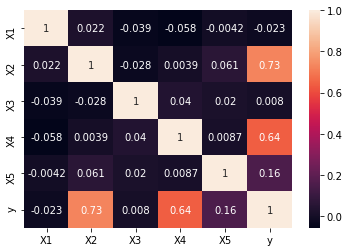

In [8]:
sns.heatmap(df.corr(), annot=True)

Como é o pairplot desses dados?

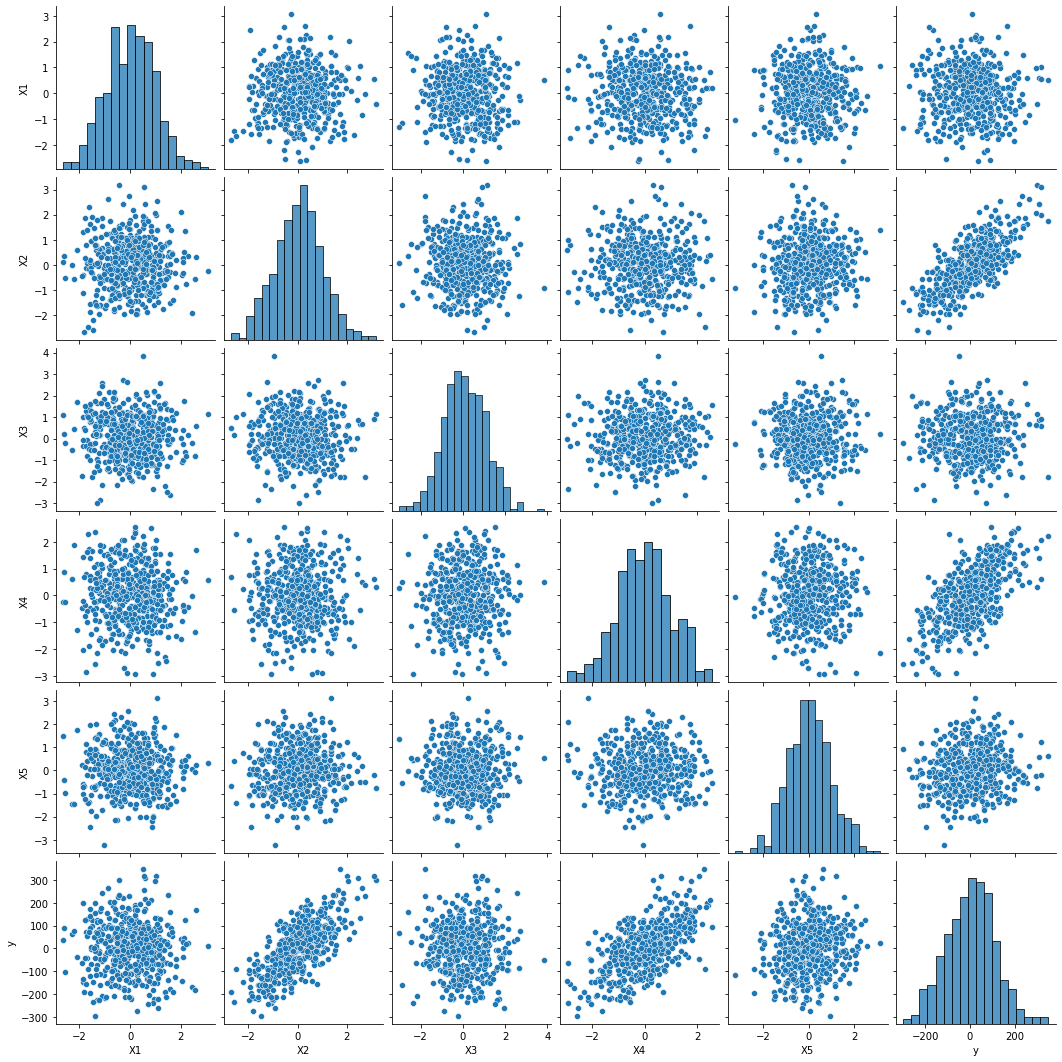

In [9]:
sns.pairplot(df)

Os dados não têm variação de escala tão grande, então não nos preocuparemos em normaliza-los.

**Mas nunca se esqueça que isso é bastante importante quando há grandes diferenças de escala!!**


Agora, implementamos o CV com 5 folds:

In [10]:
from sklearn.model_selection import KFold

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [12]:
vars(kf)

{'n_splits': 5, 'shuffle': True, 'random_state': 42}

In [13]:
type(kf.split(X))

generator

In [14]:
kf.split(X)

<generator object _BaseKFold.split at 0x000001CEB017C7B0>

In [15]:
# em cada split, temos uma tupla ([indices de treino], [indices de validação])
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index.shape[0], "TEST:", test_index.shape[0])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
print(X.shape[0])

TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
TRAIN: 400 TEST: 100
500


In [16]:
test_index.shape

(100,)

In [17]:
train_index.shape

(400,)

Como vimos acima, a classe KFold só gera os splits.

Mas, na prática, vamos usar o `cross_validate()`, que tem o KFold como argumento!!!

In [18]:
from sklearn.model_selection import cross_validate

from sklearn.linear_model import ElasticNet

Vamos considerar nesse exemplo a métrica "neg_mean_absolute_error" e retornar o score do treino:

In [19]:
# Instancia o modelo
en = ElasticNet()

# Intancia o Kfold com n_splits=5
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)

result_cv = cross_validate(estimator=en, X=df.drop("y", axis=1), y=df['y'], scoring="neg_mean_absolute_error", cv=5, return_train_score=True)

In [20]:
result_cv

{'fit_time': array([0.00799966, 0.00657225, 0.        , 0.00800061, 0.00803614]),
 'score_time': array([0.        , 0.        , 0.00800371, 0.        , 0.        ]),
 'test_score': array([-33.96246114, -35.06840614, -37.23705285, -41.6242596 ,
        -30.01797775]),
 'train_score': array([-34.77946365, -34.30326673, -35.29053374, -35.23522991,
        -34.98714489])}

In [21]:
result_cv = cross_validate(estimator=en, X=df.drop("y", axis=1), y=df['y'], scoring="neg_mean_absolute_error", cv=kf5, return_train_score=True)
result_cv

{'fit_time': array([0.01600385, 0.        , 0.00800586, 0.00800347, 0.00800061]),
 'score_time': array([0.00800085, 0.00799942, 0.00799799, 0.        , 0.        ]),
 'test_score': array([-37.24236843, -36.91545126, -33.87016282, -33.95473613,
        -33.5734684 ]),
 'train_score': array([-34.53892092, -34.92024842, -35.32918673, -35.49867268,
        -34.38269734])}

Podemos converter o resultado em dataframe do pandas:

In [22]:
df_result_cv = pd.DataFrame(result_cv)
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.016004,0.008001,-37.242368,-34.538921
1,0.000000,0.007999,-36.915451,-34.920248
2,0.008006,0.007998,-33.870163,-35.329187
3,0.008003,0.000000,-33.954736,-35.498673
4,0.008001,0.000000,-33.573468,-34.382697


In [23]:
# Vamos deixar os valores positivos
df_result_cv = df_result_cv.abs()

Vamos olhar pros resultados mais de perto... O que podemos observar de cada um dos folds?

In [24]:
df_result_cv

,fit_time,score_time,test_score,train_score
0,0.016004,0.008001,37.242368,34.538921
1,0.000000,0.007999,36.915451,34.920248
2,0.008006,0.007998,33.870163,35.329187
3,0.008003,0.000000,33.954736,35.498673
4,0.008001,0.000000,33.573468,34.382697


E na média e desvio padrão, como fica?

In [25]:
df_result_cv.describe()

,fit_time,score_time,test_score,train_score
count,5.000000,5.000000,5.000000,5.000000
mean,0.008003,0.004800,35.111237,34.933945
std,0.005658,0.004381,1.805506,0.483539
min,0.000000,0.000000,33.573468,34.382697
25%,0.008001,0.000000,33.870163,34.538921
50%,0.008003,0.007998,33.954736,34.920248
75%,0.008006,0.007999,36.915451,35.329187
max,0.016004,0.008001,37.242368,35.498673


Vamos fazer um histplot para o "train_score" e outro para o "test_score"

<AxesSubplot:xlabel='train_score', ylabel='Count'>

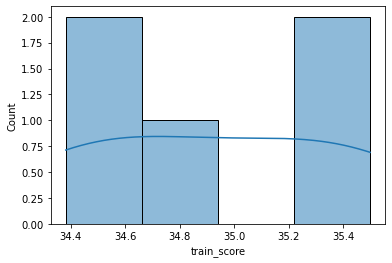

In [26]:
sns.histplot(data=df_result_cv, x='train_score', kde=True)

<AxesSubplot:xlabel='test_score', ylabel='Count'>

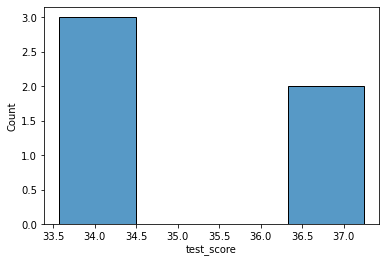

In [27]:
sns.histplot(data=df_result_cv, x="test_score")

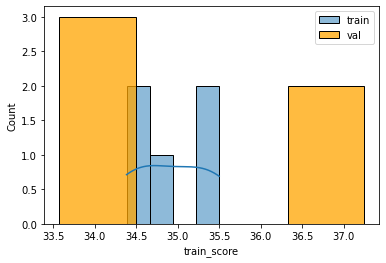

In [28]:
sns.histplot(data=df_result_cv, x='train_score', kde=True, label="train")
sns.histplot(data=df_result_cv, x="test_score", color="orange", label='val')
plt.legend()

Numa única celula:


In [29]:
result_cv

{'fit_time': array([0.01600385, 0.        , 0.00800586, 0.00800347, 0.00800061]),
 'score_time': array([0.00800085, 0.00799942, 0.00799799, 0.        , 0.        ]),
 'test_score': array([-37.24236843, -36.91545126, -33.87016282, -33.95473613,
        -33.5734684 ]),
 'train_score': array([-34.53892092, -34.92024842, -35.32918673, -35.49867268,
        -34.38269734])}

In [30]:
pd.DataFrame(result_cv)


,fit_time,score_time,test_score,train_score
0,0.016004,0.008001,-37.242368,-34.538921
1,0.000000,0.007999,-36.915451,-34.920248
2,0.008006,0.007998,-33.870163,-35.329187
3,0.008003,0.000000,-33.954736,-35.498673
4,0.008001,0.000000,-33.573468,-34.382697


In [31]:
def plot_cv(estimator, X, y, n_splits, scoring):
    '''
    scoring: string relativa às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    display(df_result_cv[["train_score", "test_score"]].describe())
    
    # ============================
    
    print("\nDistribuição de métricas de treino:")
    sns.histplot(data=df_result_cv, x="train_score", kde=True)
    plt.show()
    
    print("\nDistribuição de métricas de validação:")
    sns.histplot(data=df_result_cv, x="test_score", kde=True)
    plt.show()
    
    print("\nAs duas juntas (compare a variância!):")
    sns.histplot(data=df_result_cv, x="train_score", kde=True, label="Train")
    sns.histplot(data=df_result_cv, x="test_score", color="orange", kde=True, label="Validation")
    plt.legend()
    plt.show()

,train_score,test_score
count,5.000000,5.000000
mean,34.933945,35.111237
std,0.483539,1.805506
min,34.382697,33.573468
25%,34.538921,33.870163
50%,34.920248,33.954736
75%,35.329187,36.915451
max,35.498673,37.242368



Distribuição de métricas de treino:


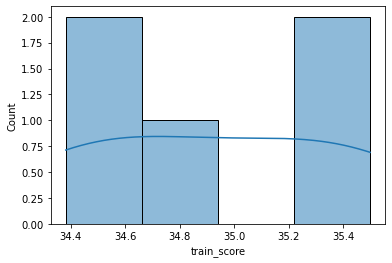


Distribuição de métricas de validação:


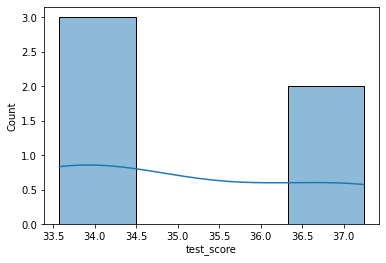


As duas juntas (compare a variância!):


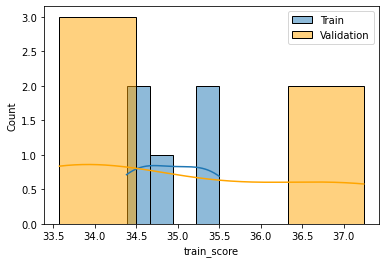

In [32]:
plot_cv(en, X, y, n_splits=5, scoring="neg_mean_absolute_error")

Vamos agora aumentar a quantidade de folds para 30. É esperada alguma mudança?

,train_score,test_score
count,30.000000,30.000000
mean,34.913566,35.118937
std,0.144129,7.124084
min,34.683546,21.635696
25%,34.816336,30.535681
50%,34.885635,35.276464
75%,35.006462,39.876677
max,35.198265,47.729019



Distribuição de métricas de treino:


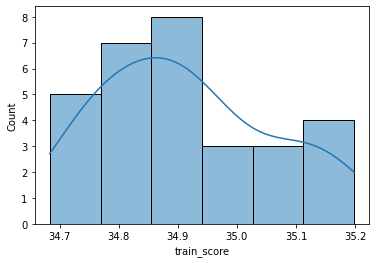


Distribuição de métricas de validação:


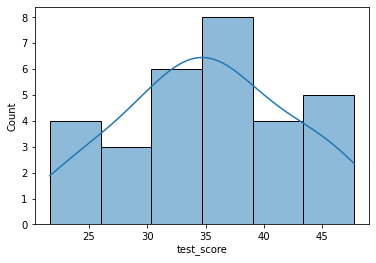


As duas juntas (compare a variância!):


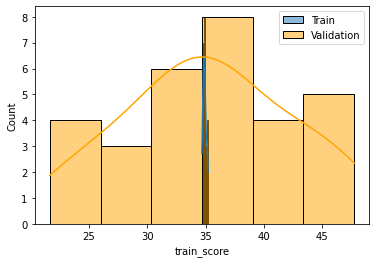

In [33]:
en = ElasticNet()

plot_cv(en, X, y, n_splits=30, scoring="neg_mean_absolute_error")

Comparando com o train-test split direto da forma como fazíamos antes (Hold out):

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ================================

en = ElasticNet().fit(X_train, y_train)

# ================================

from sklearn.metrics import mean_absolute_error

y_pred_train = en.predict(X_train)
print("\nMétrica de treino:")
print(mean_absolute_error(y_train, y_pred_train))

y_pred_test = en.predict(X_test)
print("\nMétrica de validação:")
print(mean_absolute_error(y_test, y_pred_test))


Métrica de treino:
34.52420837921775

Métrica de validação:
39.05591800744537


______
_____
____

Caso queira usar mais métricas de uma vez... SEM PROBLEMAS :)

In [35]:
n_splits = 5
estimator = ElasticNet()
scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")

kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                           cv=kf5, scoring=scoring,
                           return_train_score=True)

# ============================

df_result_cv = pd.DataFrame(result_cv)
df_result_cv = df_result_cv.abs()

df_result_cv

,fit_time,score_time,test_neg_mean_absolute_error,train_neg_mean_absolute_error,test_neg_root_mean_squared_error,train_neg_root_mean_squared_error,test_r2,train_r2
0,0.0,0.012184,37.242368,34.538921,45.674374,43.276767,0.829117,0.846058
1,0.0,0.000000,36.915451,34.920248,46.934037,43.285737,0.830471,0.844345
2,0.0,0.008005,33.870163,35.329187,42.583387,44.036324,0.858233,0.839472
3,0.0,0.000000,33.954736,35.498673,43.581829,43.966468,0.845657,0.839496
4,0.0,0.000000,33.573468,34.382697,40.419302,43.217668,0.837599,0.853698


_______________

In [36]:
def plot_cv_varias_metricas(estimator, X, y, n_splits, scoring):
    '''
    scoring: tupla de strings relativas às métricas
    '''
    
    kf5 = KFold(n_splits=n_splits, shuffle=True, random_state=42)

    result_cv = cross_validate(estimator=estimator, X=X, y=y, 
                               cv=kf5, scoring=scoring,
                               return_train_score=True)
    
    # ============================

    df_result_cv = pd.DataFrame(result_cv)
    df_result_cv = df_result_cv.abs()
    
    colunas_metricas = df_result_cv.columns.tolist()[2:]

    for i in range(0, len(colunas_metricas), 2):

        display(df_result_cv[[colunas_metricas[i+1], colunas_metricas[i]]].describe())

        print(f'\nDistribuição da métrica {colunas_metricas[i+1].replace("train_", "")} de treino:')
        sns.histplot(data=df_result_cv, x=colunas_metricas[i+1], kde=True)
        plt.show()

        print(f'\nDistribuição da métrica {colunas_metricas[i].replace("test_", "")} de validação:')
        sns.histplot(data=df_result_cv, x=colunas_metricas[i], kde=True)
        plt.show()

        print("\nAs duas juntas (compare a variância!):")
        sns.histplot(data=df_result_cv, x=colunas_metricas[i+1], label="treino", kde=True)
        sns.histplot(data=df_result_cv, x=colunas_metricas[i], color="orange", label="validação", kde=True)
        plt.legend()
        plt.show()
        
        print("#"*80)
    

,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,30.000000,30.000000
mean,34.913566,35.118937
std,0.144129,7.124084
min,34.683546,21.635696
25%,34.816336,30.535681
50%,34.885635,35.276464
75%,35.006462,39.876677
max,35.198265,47.729019



Distribuição da métrica neg_mean_absolute_error de treino:


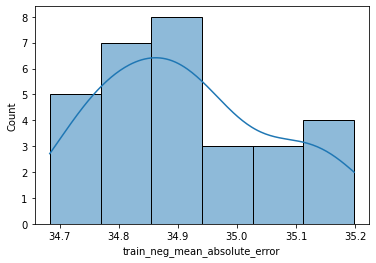


Distribuição da métrica neg_mean_absolute_error de validação:


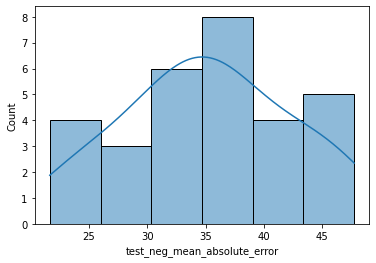


As duas juntas (compare a variância!):


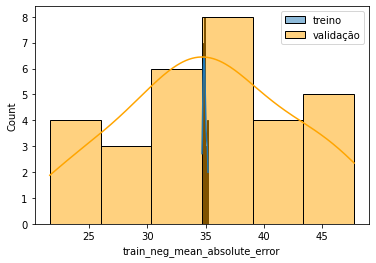

################################################################################


,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
count,30.000000,30.000000
mean,43.561148,43.161349
std,0.134884,7.876156
min,43.302666,27.779693
25%,43.473587,38.337612
50%,43.543192,42.605086
75%,43.634248,48.166132
max,43.839619,60.211813



Distribuição da métrica neg_root_mean_squared_error de treino:


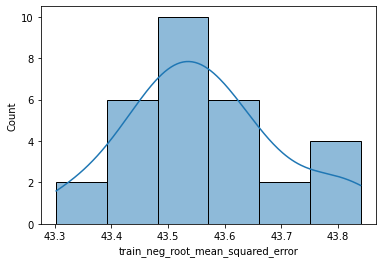


Distribuição da métrica neg_root_mean_squared_error de validação:


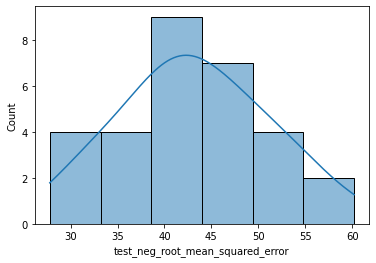


As duas juntas (compare a variância!):


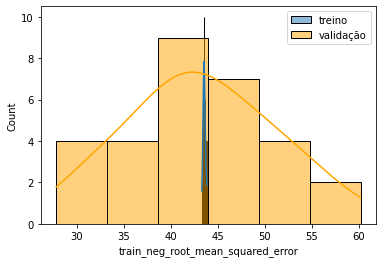

################################################################################


,train_r2,test_r2
count,30.000000,30.000000
mean,0.844783,0.828963
std,0.002616,0.036106
min,0.839848,0.749952
25%,0.842733,0.812329
50%,0.845213,0.826827
75%,0.846661,0.853945
max,0.849561,0.892042



Distribuição da métrica r2 de treino:


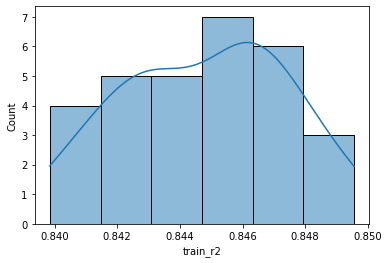


Distribuição da métrica r2 de validação:


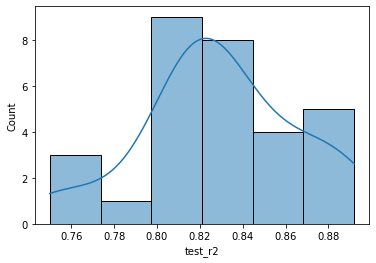


As duas juntas (compare a variância!):


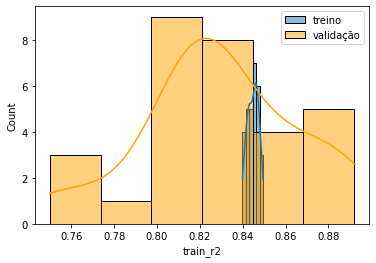

################################################################################


In [37]:
en = ElasticNet()
scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")

plot_cv_varias_metricas(en, X, y, n_splits=30, scoring=scoring)

_____

Vamos agora ver um caso de **classificação**:

In [38]:
from sklearn.datasets import make_classification

X_clf, y_clf = make_classification(n_samples=500,
                                 n_features=5, n_informative=3,
                                 n_classes=2,
                                 random_state=42)

X_clf_df = pd.DataFrame(X_clf, columns=[f'X{i+1}' for i in range(X_clf.shape[1])]) 
y_clf_df = pd.Series(y_clf, name="y")
                        
df_clf = pd.concat([X_clf_df, y_clf_df], axis=1)

df_clf

,X1,X2,X3,X4,X5,y
0,0.280056,-1.126421,-0.772964,2.060626,-2.357044,0
1,-0.326002,0.343967,1.535987,-1.794578,1.293605,1
2,-0.802972,-1.112616,-1.088524,0.668720,-1.183952,0
3,0.012285,-0.350602,-1.359103,1.234112,-0.909008,0
4,0.043145,-1.077267,-0.873334,1.727960,-2.031498,0
...,...,...,...,...,...,...
495,-0.487169,-0.351560,0.458356,-0.631618,0.076135,0
496,-0.114580,-1.433468,-0.513094,1.641968,-2.358049,0
497,-1.292011,-0.504030,0.758286,-1.832484,0.803280,1
498,0.287141,1.553864,0.125348,-1.272565,2.271871,1


Vamos ver como fica o pairplot com as cores provenientes do y 

Agora, vamos utilizar a função criada acima para visualizar o CV:

- uma regressão logística com regularização (penalty) l1, fator de regularização (C) igual a 1.2 e o solver "liblinear";
- 10 folds;
- roc_auc e f1 como métricas de avaliação.

In [39]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

,train_roc_auc,test_roc_auc
count,10.000000,10.000000
mean,0.942924,0.940542
std,0.002434,0.024233
min,0.940244,0.893268
25%,0.941592,0.935096
50%,0.942079,0.951190
75%,0.943093,0.953525
max,0.947925,0.967159



Distribuição da métrica roc_auc de treino:


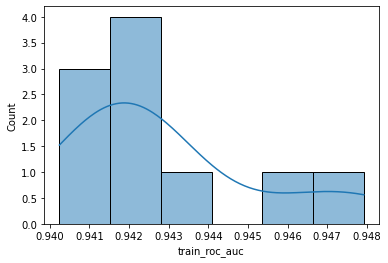


Distribuição da métrica roc_auc de validação:


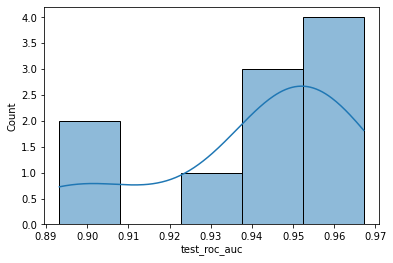


As duas juntas (compare a variância!):


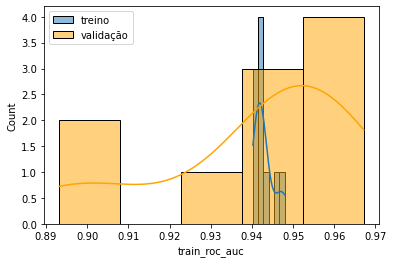

################################################################################


,train_f1,test_f1
count,10.000000,10.000000
mean,0.884017,0.879293
std,0.005443,0.050879
min,0.876404,0.800000
25%,0.879186,0.858374
50%,0.884975,0.870326
75%,0.887523,0.920000
max,0.891775,0.947368



Distribuição da métrica f1 de treino:


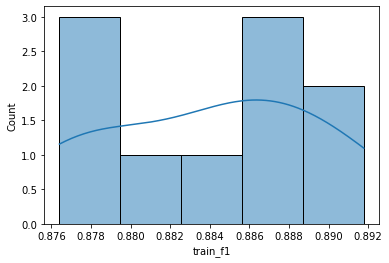


Distribuição da métrica f1 de validação:


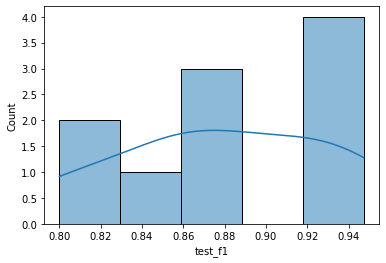


As duas juntas (compare a variância!):


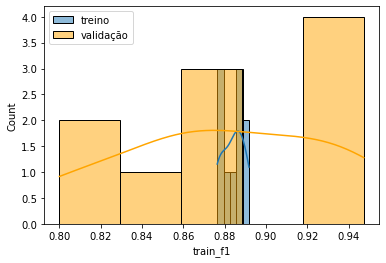

################################################################################


In [40]:
plot_cv_varias_metricas(lr, X_clf, y_clf, n_splits=10, scoring=("roc_auc", "f1"))

____________
____________

## 2) Ajuste de hiperparâmetros

Além de permitir uma avaliação mais robusta de um modelo, o CV pode também ser utilizado para um propósito muito importante: **a escolha de valores adequados de hiperparâmetros** de um modelo -- processo conhecido como **hyperparameter tuning**.

<img src=https://www.okw.com/en/Com-Knobs/COM-KNOBS-class-OKW_GroupInfoImage500x408.jpg width=300>

Em aulas futuras vamos estudar como fazer este procedimento.

Ao testarmos diferentes valores/combinações de hiperparâmetros em diferentes folds, temos uma estimativa mais realista sobre o efeito destas escolhas: se o resultado for bom em todos os folds (ou bom em média), temos um indicativo mais robusto de que de fato aquela é uma boa escolha. Em particular, fica muito mais difícil de cometermos **overfitting** através da escolha de hiperparâmetros que ajustem muito bem uma única base de treino. Faz sentido, né?

Para saber mais sobre estas questões, sugiro [este post](https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d) e [este post](https://machinelearningmastery.com/nested-cross-validation-for-machine-learning-with-python/).

No sklearn, temos o procedimento de CV incorporado a algumas classes de hipóteses:

- [Lasso CV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)
- [Ridge CV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html)
- [ElasticNetCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html)
- [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegressionCV.html)

Em todos os casos, é possível especificar uma lista de hiperparâmetros a serem percorridos, e o modelo com a melhor combinação de hiperparâmetros é escolhido! 

____________
____________

## Bibliografia e Material de aprofundamento
- [Porque a métrica é negativa?](https://stackoverflow.com/questions/21050110/sklearn-gridsearchcv-with-pipeline)
- [Métricas](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter)
- [Time Series Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html#sklearn.model_selection.TimeSeriesSplit)
- [Sklearn Cross validation iterators](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators)
- [Regularização](https://afit-r.github.io/regularized_regression)

____________
____________
### Agora é sua vez!!

- 1 - Teste diferentes regressores CV com a base house_prices

    

In [41]:
# house_prices
# instanciar o Kfold

# instanciar modelo 1 -> Elasticnet alpha=1.3

#rodam cross_validate

# instanciar modelo 2 -> Elasticnet alpha=1.5

#rodam cross_validate

# instanciar modelo 3 -> Elasticnet alpha=0.9

#rodam cross_validate



#comparar metrica de erro entre modelo 1, 2 e 3 e escolher o melhor


In [42]:
df = pd.read_csv('house_prices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [43]:
X = df.drop(columns=["Id", "SalePrice"])
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_model = X_train.select_dtypes(include=np.number).dropna(axis="columns")
X_test_model = X_test.loc[:, X_train_model.columns]

In [44]:
reg = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=1,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)


Métricas de avaliação (dados de treino):

R^2: 0.80
MAE: 21054.72
RMSE: 34241.17
MAPE: 12.42%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.82
MAE: 22938.25
RMSE: 37312.27
MAPE: 13.45%


In [45]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

In [46]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(ElasticNet(alpha=1.3), X_train_model, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.850e+11, tolerance: 5.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.383e+11, tolerance: 5.617e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.463e+11, to

[0.83431837 0.79445308 0.75008546 0.49625996 0.81193814 0.8521986 ]
0.7565422676688812
0.12075716613785131


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.676e+11, tolerance: 5.819e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+11, tolerance: 5.908e+08
  model = cd_fast.enet_coordinate_descent(


In [47]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(ElasticNet(alpha=1.5), X_train_model, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.922e+11, tolerance: 5.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.453e+11, tolerance: 5.617e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.530e+11, to

[0.83263808 0.79285448 0.74776959 0.49165029 0.80931303 0.85083475]
0.7541767042451766
0.12178951691582524


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.174e+11, tolerance: 5.743e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.742e+11, tolerance: 5.819e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.020e+11, to

In [48]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(ElasticNet(alpha=.9), X_train_model, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.670e+11, tolerance: 5.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.205e+11, tolerance: 5.617e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.292e+11, to

[0.83788533 0.7978817  0.75503977 0.50721193 0.81763265 0.85493491]
0.761764382838618
0.11814048375859391


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.989e+11, tolerance: 5.743e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.508e+11, tolerance: 5.819e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.761e+11, to

In [49]:
modelo, _, _ = reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization=None,
                                      iter_max=2000,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.96
MAE: 10528.16
RMSE: 14982.18
MAPE: 6.41%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.65
MAE: 27307.25
RMSE: 51512.62
MAPE: 17.82%


In [50]:
# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(modelo, X_train_model, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)
print(np.mean(cv_scores))
print(np.std(cv_scores))

[0.80271333 0.85871965 0.78943808 0.70268579 0.84051625 0.45304772
 0.8202092  0.81290493 0.86362355 0.83783465]
0.7781693149818923
0.1167660047228227


In [51]:
en = ElasticNet(alpha=1.3)

# Intancia o Kfold com n_splits=5
kf5 = KFold(n_splits=6, shuffle=True, random_state=42)

result_cv = cross_validate(estimator=en, X=X_train_model, y=y_train, scoring="r2", cv=kf5, return_train_score=True)
print(result_cv)
print(np.mean(result_cv['test_score']))

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.850e+11, tolerance: 5.852e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.383e+11, tolerance: 5.617e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.463e+11, to

{'fit_time': array([0.05413413, 0.04799294, 0.05601597, 0.09603834, 0.08002114,
       0.05601335]), 'score_time': array([0.00832129, 0.        , 0.00800037, 0.00800133, 0.        ,
       0.00798655]), 'test_score': array([0.83431837, 0.79445308, 0.75008546, 0.49625996, 0.81193814,
       0.8521986 ]), 'train_score': array([0.77596988, 0.78232145, 0.79093699, 0.82934703, 0.77777285,
       0.77450015])}
0.7565422676688812


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.121e+11, tolerance: 5.743e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.676e+11, tolerance: 5.819e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.946e+11, to

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.631e+11, tolerance: 6.750e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.625e+11, tolerance: 6.817e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.551e+11, to

C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.720e+11, tolerance: 6.827e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.670e+11, tolerance: 6.828e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.455e+11, to

,train_neg_mean_absolute_error,test_neg_mean_absolute_error
count,30.000000,30.000000
mean,20864.930057,21563.735155
std,196.407366,5565.805706
min,20122.588882,12235.774710
25%,20807.178770,18308.396498
50%,20910.667973,21120.280210
75%,20971.368667,23533.531312
max,21147.891580,42668.022222



Distribuição da métrica neg_mean_absolute_error de treino:


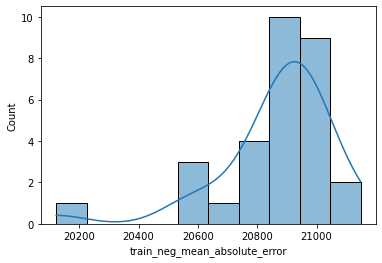


Distribuição da métrica neg_mean_absolute_error de validação:


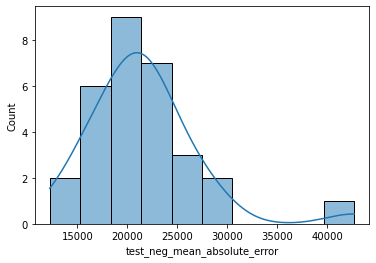


As duas juntas (compare a variância!):


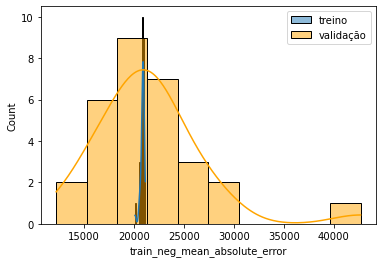

################################################################################


,train_neg_root_mean_squared_error,test_neg_root_mean_squared_error
count,30.000000,30.000000
mean,35694.298690,33967.888215
std,927.334801,17530.122424
min,31059.519501,16572.840618
25%,35765.688394,25201.383827
50%,35944.064535,29537.162884
75%,36036.789428,34905.966281
max,36180.661557,111897.429811



Distribuição da métrica neg_root_mean_squared_error de treino:


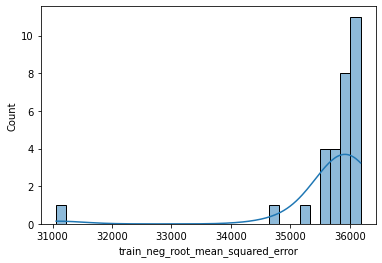


Distribuição da métrica neg_root_mean_squared_error de validação:


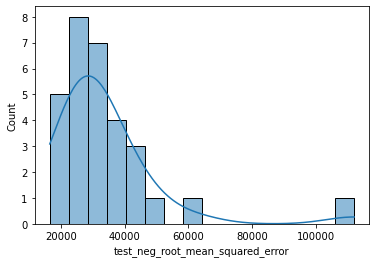


As duas juntas (compare a variância!):


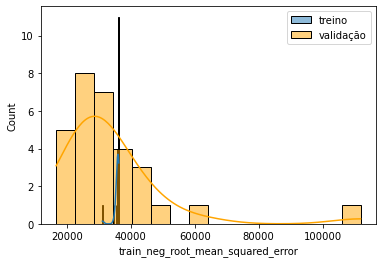

################################################################################


,train_r2,test_r2
count,30.000000,30.000000
mean,0.786306,0.777905
std,0.008897,0.188156
min,0.781399,0.067076
25%,0.783258,0.784446
50%,0.784209,0.835894
75%,0.785653,0.865551
max,0.830262,0.910606



Distribuição da métrica r2 de treino:


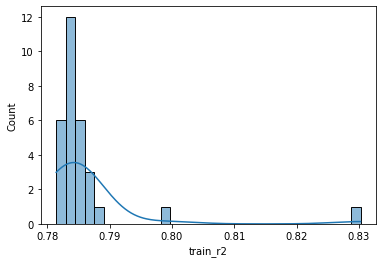


Distribuição da métrica r2 de validação:


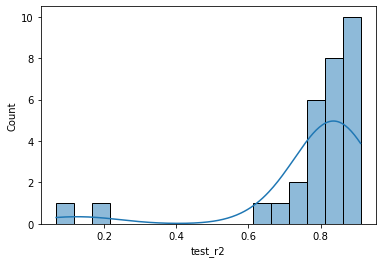


As duas juntas (compare a variância!):


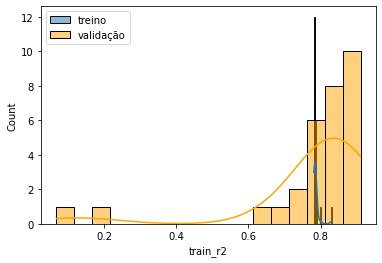

################################################################################


In [52]:
en = ElasticNet(alpha=1.3)
scoring=("neg_mean_absolute_error", "neg_root_mean_squared_error", "r2")

plot_cv_varias_metricas(en, X_train_model, y_train, n_splits=30, scoring=scoring)

,train_score,test_score
count,30.000000,30.000000
mean,0.803995,0.782973
std,0.008132,0.173810
min,0.799469,0.153848
25%,0.801160,0.788273
50%,0.802159,0.840830
75%,0.803516,0.865631
max,0.843848,0.932212



Distribuição da métrica score de treino:


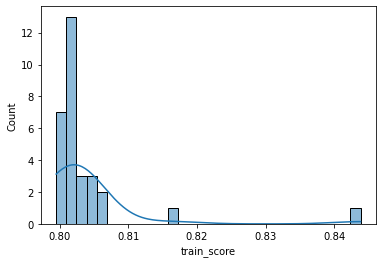


Distribuição da métrica score de validação:


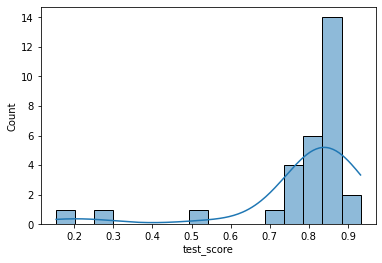


As duas juntas (compare a variância!):


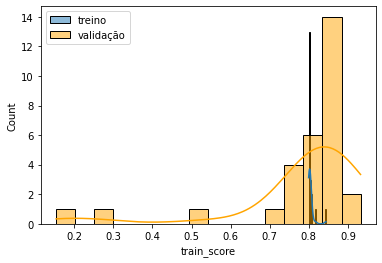

################################################################################


In [53]:
en = modelo
scoring=("r2")

plot_cv_varias_metricas(en, X_train_model, y_train, n_splits=30, scoring=scoring)

In [54]:
result_cv

{'fit_time': array([0.05413413, 0.04799294, 0.05601597, 0.09603834, 0.08002114,
        0.05601335]),
 'score_time': array([0.00832129, 0.        , 0.00800037, 0.00800133, 0.        ,
        0.00798655]),
 'test_score': array([0.83431837, 0.79445308, 0.75008546, 0.49625996, 0.81193814,
        0.8521986 ]),
 'train_score': array([0.77596988, 0.78232145, 0.79093699, 0.82934703, 0.77777285,
        0.77450015])}

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):



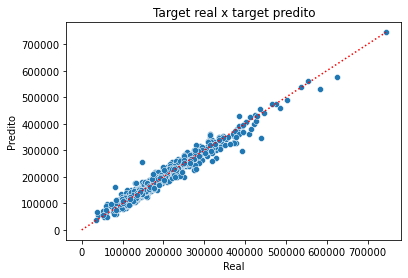

R^2: 0.96
MAE: 10528.16
RMSE: 14982.18
MAPE: 6.41%

Distribuição dos resíduos de treino:

count    1.168000e+03
mean    -7.466911e-07
std      1.498859e+04
min     -1.085426e+05
25%     -8.016138e+03
50%      4.929192e-01
75%      8.172938e+03
max      9.457485e+04
Name: SalePrice, dtype: float64


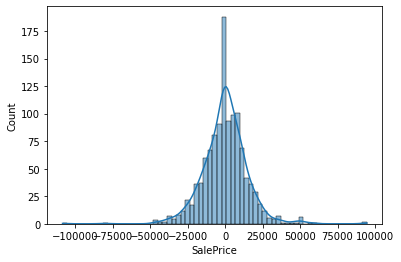


##################################################

Métricas de avaliação (dados de teste):



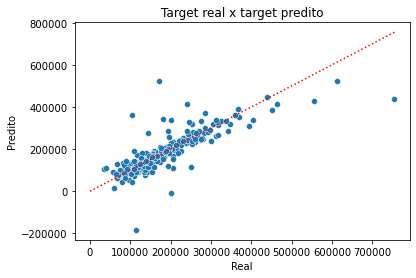

R^2: 0.65
MAE: 27307.25
RMSE: 51512.62
MAPE: 17.82%

Distribuição dos resíduos de teste:

count       292.000000
mean       1248.446923
std       51585.897163
min     -353345.126807
25%      -13377.276551
50%        1166.358874
75%       15438.545932
max      318725.834764
Name: SalePrice, dtype: float64


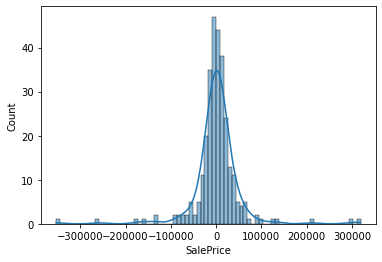

In [55]:
reg, _,_ = reg_lin_poly_features(X_train_model, y_train, X_test_model, y_test, 
                          deg=2,
                          plot=True, scale_mms=False, 
                          train_metrics=True, 
                          dist_resids=True,
                          plot_model=False)

In [56]:
# Create a KFold object
kf = KFold(n_splits=10, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(Ridge(alpha=1), X_train_model, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)

[0.80281998 0.85871211 0.78966155 0.70275023 0.84061231 0.45291801
 0.82028793 0.81313576 0.86389283 0.83780916]


In [57]:
modelo

LinearRegression()

In [58]:
pf = PolynomialFeatures(degree=2, include_bias=False).fit(X_train_model)
        
X_train = pf.transform(X_train_model)
X_test = pf.transform(X_test_model)

In [59]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)



# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(LinearRegression(), X_train, y_train, cv=kf, scoring='r2')

# Print scores
print(cv_scores)

[ -1.93002318  -5.68403449   0.44235671   0.19686859  -2.51243178
 -96.28366972 -17.74115236 -56.75942513  -3.78749506 -16.83023691]


C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.342e+11, tolerance: 6.427e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.395e+11, tolerance: 5.993e+08
  model = cd_fast.enet_coordinate_descent(
C:\Users\Usuario\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+11, to

,train_score,test_score
count,10.000000,10.000000
mean,0.956444,0.491749
std,0.002638,0.237773
min,0.951666,0.062874
25%,0.955109,0.365543
50%,0.956245,0.518145
75%,0.958250,0.669725
max,0.960733,0.843276



Distribuição da métrica score de treino:


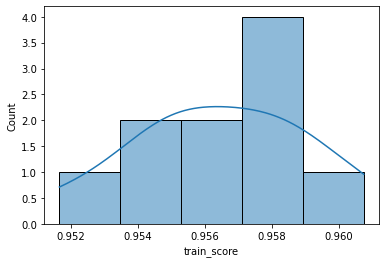


Distribuição da métrica score de validação:


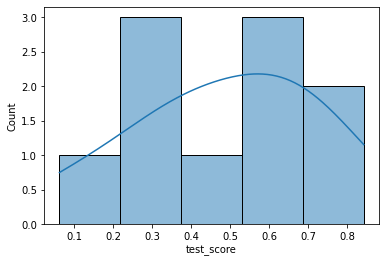


As duas juntas (compare a variância!):


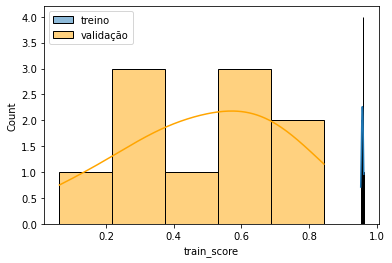

################################################################################


In [60]:
en = Lasso(alpha=50, max_iter=2000)
scoring=("r2")

plot_cv_varias_metricas(en, X_train, y_train, n_splits=10, scoring=scoring)


Métricas de avaliação (dados de treino):



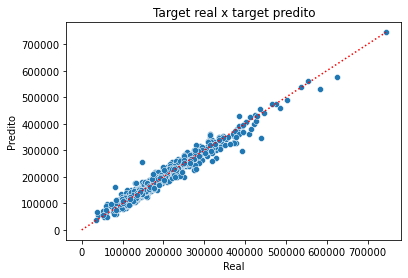

R^2: 0.96
MAE: 10528.16
RMSE: 14982.18
MAPE: 6.41%

Distribuição dos resíduos de treino:

count    1.168000e+03
mean    -7.466911e-07
std      1.498859e+04
min     -1.085426e+05
25%     -8.016138e+03
50%      4.929192e-01
75%      8.172938e+03
max      9.457485e+04
Name: SalePrice, dtype: float64


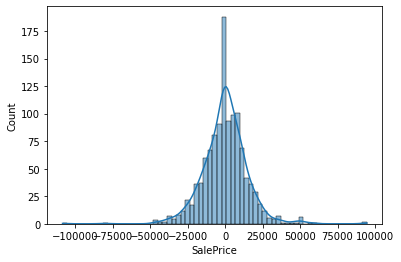


##################################################

Métricas de avaliação (dados de teste):



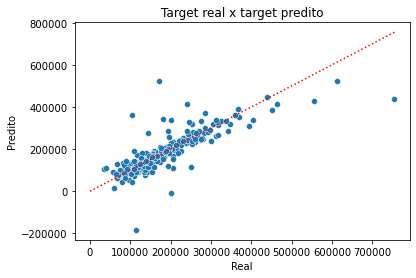

R^2: 0.65
MAE: 27307.25
RMSE: 51512.62
MAPE: 17.82%

Distribuição dos resíduos de teste:

count       292.000000
mean       1248.446923
std       51585.897163
min     -353345.126807
25%      -13377.276551
50%        1166.358874
75%       15438.545932
max      318725.834764
Name: SalePrice, dtype: float64


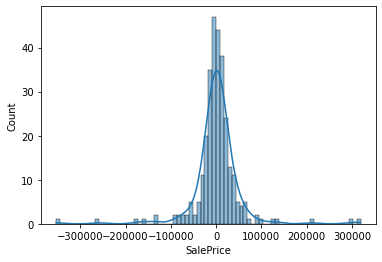

LinearRegression()

In [61]:
reg_lin_pt1_pt2(X_train, y_train, X_test, y_test, 
                    plot=True, scale_mms=False, 
                    train_metrics=True, dist_resids=True)

In [62]:
reg_lin_poly_features_regularized(X_train_model, y_train,
                                      X_test_model, y_test,  
                                      deg=2,
                                      type_regularization=None,
                                      plot=False, scale_mms=False, 
                                      train_metrics=True, 
                                      dist_resids=False,
                                      plot_model=False)

Modelo com espaço de features transformado!

Número de features original: 33
Número de features após o transformer: 594


Métricas de avaliação (dados de treino):

R^2: 0.96
MAE: 10528.16
RMSE: 14982.18
MAPE: 6.41%

##################################################

Métricas de avaliação (dados de teste):

R^2: 0.65
MAE: 27307.25
RMSE: 51512.62
MAPE: 17.82%


(LinearRegression(),
 {'r2': 0.9623667135615963,
  'mae': 10528.164594481661,
  'rmse': 14982.17717550398,
  'mape': 0.06408061716899871},
 {'r2': 0.6540499111038308,
  'mae': 27307.25309606611,
  'rmse': 51512.62013564251,
  'mape': 0.17819321267679053})